In [178]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import norm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('DS1_C4_S5_Students_Scores_Data_Practice.csv')
data

,Name,Statistics,Python,Tableau
0,David,62,89,56
1,James,47,87,86
2,Robert,55,67,77
3,Thomas,74,55,45
4,Steven,31,47,73
5,Paul,77,72,62
6,Gary,85,76,74
7,Justin,63,79,89
8,Patrick,42,44,67
9,Tyler,32,99,67


In [61]:
# task 1 - Use the measure of central tendency to identify the technology in which the students have shown the best performance

avg = []
med = []
mod = []

df = data.drop(['Name'], axis = 1)

for i in df:
    avg.append(df[i].mean())
    med.append(df[i].median())
    mod.append(st.mode(df[i]))
    
ndf = pd.DataFrame([avg, med, mod], columns = ['Statistics', 'Python', 'Tableau'])
ndf.insert(0, 'Central Tendencies', value = ['Average', 'Median', 'Mode'])
ndf

,Central Tendencies,Statistics,Python,Tableau
0,Average,58.5,73.583333,71.75
1,Median,62.5,74.000000,70.50
2,Mode,63.0,99.000000,67.00


In [62]:
# task 2 Measure variability to identify the tech that shows the best performance by all the learners

avg=[]
stdev=[]
cv=[]

for i in df:
    avg.append(df[i].mean())
    stdev.append(df[i].std())
    cv.append(((df[i].std())*100)/df[i].mean())
    
t2 = pd.DataFrame([avg, stdev, cv], columns = ['Statistics', 'Python', 'Tableau'])
t2.insert(0, ' ', ['Average', 'Standard Deviaion', 'Coefficient of Variance'])

t2

,,Statistics,Python,Tableau
0,Average,58.500000,73.583333,71.750000
1,Standard Deviaion,17.500649,18.436418,14.429295
2,Coefficient of Variance,29.915640,25.055155,20.110515


In [72]:
#task 3 Identify the tech whose score is skewed more than the others by calculating the outliers

for i in df: 
    uout=[]
    lout=[]
    mi=min(df[i])
    ma=max(df[i])
    ra=ma-mi
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    
    for i in df[i]:
        if i > uf:
            uout.append(i)
        elif i<lf:
            lout.append(i)
            
    if software=='Statistics':
        Statistics=[mi,ma,ra,q1,q3,iqr,lf,uf,[lout,uout]]
        
    elif software=='Python':
        Python=[mi,ma,ra,q1,q3,iqr,lf,uf,[lout,uout]]
        
    elif software=='Tableau':
        Tableau=[mi,ma,ra,q1,q3,iqr,lf,uf,[lout,uout]]
             
t3 = pd.DataFrame([Statistics,Python,Tableau], columns=['Minimum','Maximum','Range','Q1','Q3','IQR','Lowerfence','Upperfence','Outlier'])
t3.insert(0, 'Subject', ['Statistics','Python','Tableau']) 

t3

,Subject,Minimum,Maximum,Range,Q1,Q3,IQR,Lowerfence,Upperfence,Outlier
0,Statistics,31,85,54,45.75,71.75,26.0,6.75,110.75,"[[], []]"
1,Python,44,99,55,64.00,87.50,23.5,28.75,122.75,"[[], []]"
2,Tableau,45,97,52,65.75,79.25,13.5,45.50,99.50,"[[45], []]"


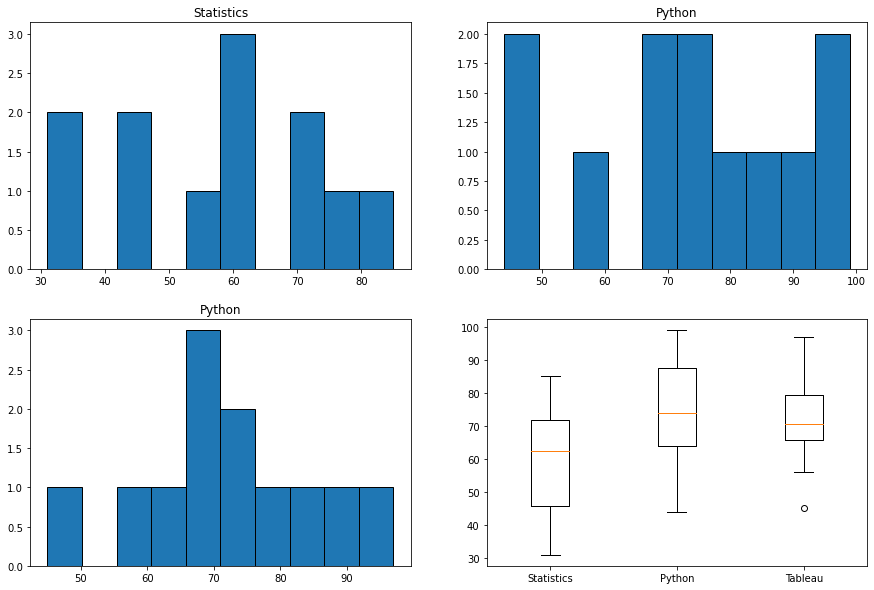

In [169]:
# task 4 Visually present the distribution of scores obtained by students in different tech using the appropriate types of charts/ graphs

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Statistics'], edgecolor = 'black')
plt.title('Statistics')

plt.subplot(2, 2, 2)
plt.hist(df['Python'], edgecolor = 'black')
plt.title('Python')

plt.subplot(2, 2, 3)
plt.hist(df['Tableau'], edgecolor = 'black')
plt.title('Python')

plt.subplot(2, 2, 4)
plt.boxplot(df)
plt.xticks([1, 2, 3], ['Statistics', 'Python', 'Tableau']);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Kurtosis of Statistics    =     -1.0438440476747421
Kurtosis of Python        =     -1.0159472252820545
Kurtosis of Tableau       =     -0.4356912494591376
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


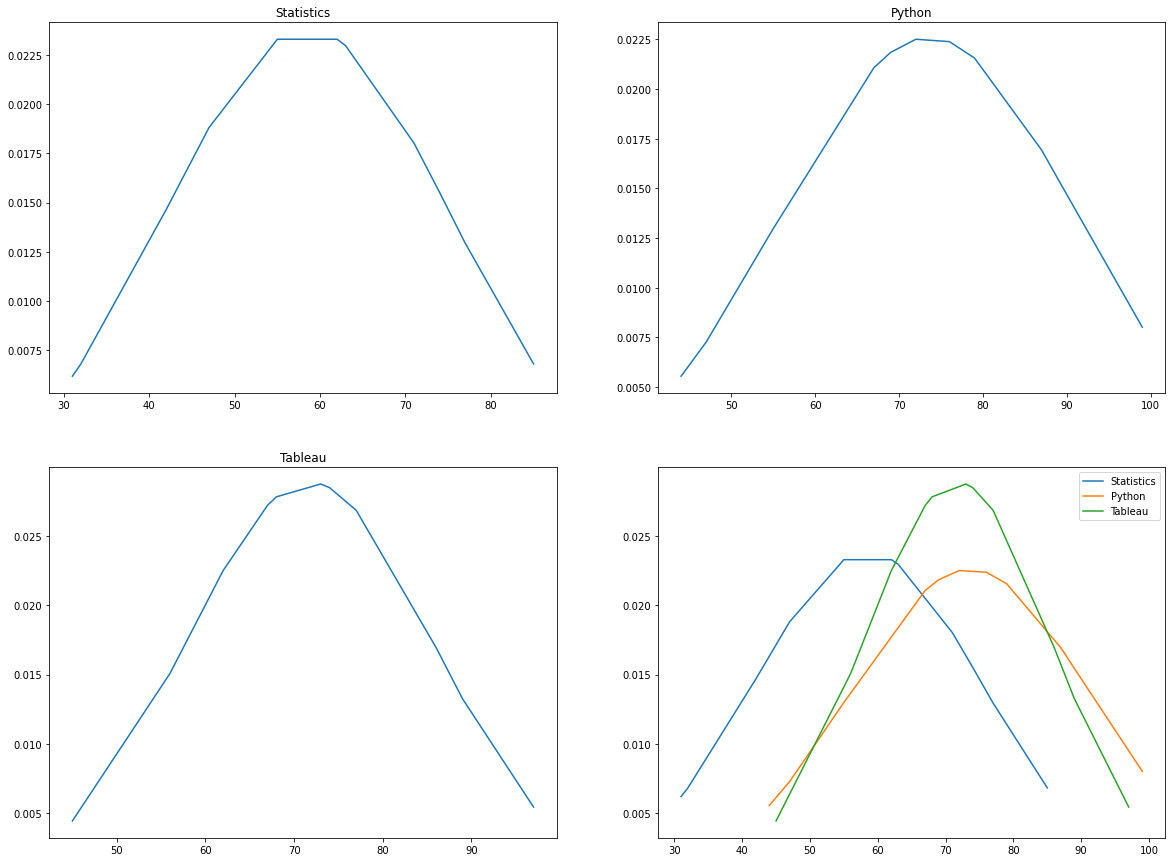

In [189]:
# task 5 Reveal the types of tails that exist in the distribution of data for each tech using kurtosis and appropriate visualization 

stadat = df.Statistics.tolist()
pydat = df.Python.tolist()
tabdat = df.Tableau.tolist()

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(f"""
Kurtosis of Statistics    =     {kurtosis(stadat)}
Kurtosis of Python        =     {kurtosis(pydat)}
Kurtosis of Tableau       =     {kurtosis(tabdat)}""")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')



stadat = sorted(stadat)
pydat = sorted(pydat)
tabdat = sorted(tabdat)

statmean = np.mean(stadat)
statstd = np.std(stadat)
pymean = np.mean(pydat)
pystd = np.std(pydat)
tabmean = np.mean(tabdat)
tabstd = np.std(tabdat)

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(stadat, norm.pdf(stadat, statmean, statstd), label = 'Statistics')
plt.title('Statistics')

plt.subplot(2, 2, 2)
plt.plot(pydat, norm.pdf(pydat, pymean, pystd), label = 'Python')
plt.title('Python')

plt.subplot(2, 2, 3)
plt.plot(tabdat, norm.pdf(tabdat, tabmean, tabstd),  label = 'Tableau')
plt.title('Tableau')

plt.subplot(2, 2, 4)
plt.plot(stadat, norm.pdf(stadat, statmean, statstd),  label = 'Statistics')
plt.plot(pydat, norm.pdf(pydat, pymean, pystd),  label = 'Python')
plt.plot(tabdat, norm.pdf(tabdat, tabmean, tabstd),  label = 'Tableau')
plt.legend()

# task 6 conclusion

task 1 - Mean, median and mode of statistics is 58.5, 62.5, 63 respectively.
         Mean, median and mode of Python is 73.58, 74, 70.5 respectively.
         Mean, median and mode of tableau is 71.75, 70.50, 67 respectively.
        
task 2 - Mean, Standard deviation and Coefficient of variance of statistics is 58.5, 17.5, 29.9 respectively.
         Mean, Standard deviation and Coefficient of variance of Python is 73.58, 18.43, 14.42 respectively.
         Mean, Standard deviation and Coefficient of variance of Tableau is 71.75, 14.42, 20.11 respectively.
         
task 3 - Min, Max, IQR, outlier of Statistics is 31, 85, 26, 0 respectively.
         Min, Max, IQR, outlier of Python is 44, 99, 23.5, 0 respectively.
         Min, Max, IQR, outlier of Tableau is 45, 97, 13.5, 45 respectively.
         Data of python is spread more with range 55.
         
task 4 - Statistics and Python are left skewed where as Tableau is right skewed.

task 5 - Kurtosis of Statistics is -1.0438440476747421.
         Kurtosis of Python is -1.0159472252820545.
         Kurtosis of Tableau is -0.4356912494591376.